# Example: Mode search in an SXS waveform

In this example we will be using the procedure listed out in the methods paper to search for QNMs within a waveform.
The two-stage procedure starts by identifing potential modes via a frequency-agnostic fits, then checks their stability with frequency-fixed fits. 

### Import modules

In [1]:
from jaxqualin.selection import ModeSearchAllFreeVaryingNSXS
from jaxqualin.utils import load_pickle_file
from jaxqualin.plot import plot_mode_searcher_results

import numpy as np

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


### Settings for mode-searcher object

These are the default settings used in the methods paper (cf. Table I).

In [2]:
settings = dict(alpha_r = 0.05, alpha_i = 0.05,
                tau_agnostic = 10, p_agnostic = 0.95, 
                beta_A = 1.0, beta_phi = 1.5, A_tol = 1e-3,
                tau_stable = 10, p_stable = 0.95)

### Prepare mode-searcher object

`N_list` is a list of $N_f$ free QNMs to include in the frequency agnostic fit.
A frequency agnoistic fit will be performed for each $N_f$ in `N_list`, and a list of potential modes will be compiled from the best run among them.

In [3]:
mode_searcher_load_pickle = False # whether or not to load the mode-searcher from a cached run

SXS_num = '0305'
l, m = 2, 2
N_list = [3]
t0_arr = np.linspace(0, 50, 501)

# mode-searcher object
mode_search_sxs = ModeSearchAllFreeVaryingNSXS(SXS_num, l, m, N_list = N_list, initial_num = 10, 
                                               random_initial = True, load_pickle = True,
                                               t0_arr = t0_arr, postfix_string = 'example',
                                               **settings)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


### Run mode-searcher

If `mode_searcher_load_pickle` is `True` and a pickle file from a previous run with the same `postfix_string` exists, the mode-searcher object will load the results from it.

In [4]:
if mode_search_sxs.pickle_exists() and mode_searcher_load_pickle:
    file_path = mode_search_sxs.file_path
    mode_search_sxs = load_pickle_file(file_path)
    print('pickle loaded')
else:
    mode_search_sxs.do_mode_search_varying_N()

Runname: SXS0305_lm_2.2, making initial guesses for N_free = 3. Status:   0%|          | 0/10 [00:00<?, ?it/s]

Runname: SXS0305_lm_2.2, fitting for N_free = 3. Status:   0%|          | 0/501 [00:00<?, ?it/s]

Runname: SXS0305_lm_2.2, N_free = 3, potential modes: 2.2.1, 3.2.0, 2.2.0
Performing amplitude and phase flatness check for N_free = 3


Runname: SXS0305_lm_2.2, fitting with the following modes: 2.2.1, 3.2.0, 2.2.0. Status:   0%|          | 0/501…

Runname: SXS0305_lm_2.2, N_free = 3, found the following 3 modes: 
2.2.1, 3.2.0, 2.2.0
Runname: SXS0305_lm_2.2_N_3, final list of modes: 
2.2.1, 3.2.0, 2.2.0


### Plotting the results

The left panel shows the result of the best instance of the frequency-agnostic fits among `N_list`.
The center and right panels are the amplitudes and phases obtained for all the modes within the potential mode list that passed the stability test.
The bolded line segments are the regions where the amplitude and phase are the flattest, and the circle marks the time at which the mode has begun to stabilize.
Please consult the methods paper for the details.

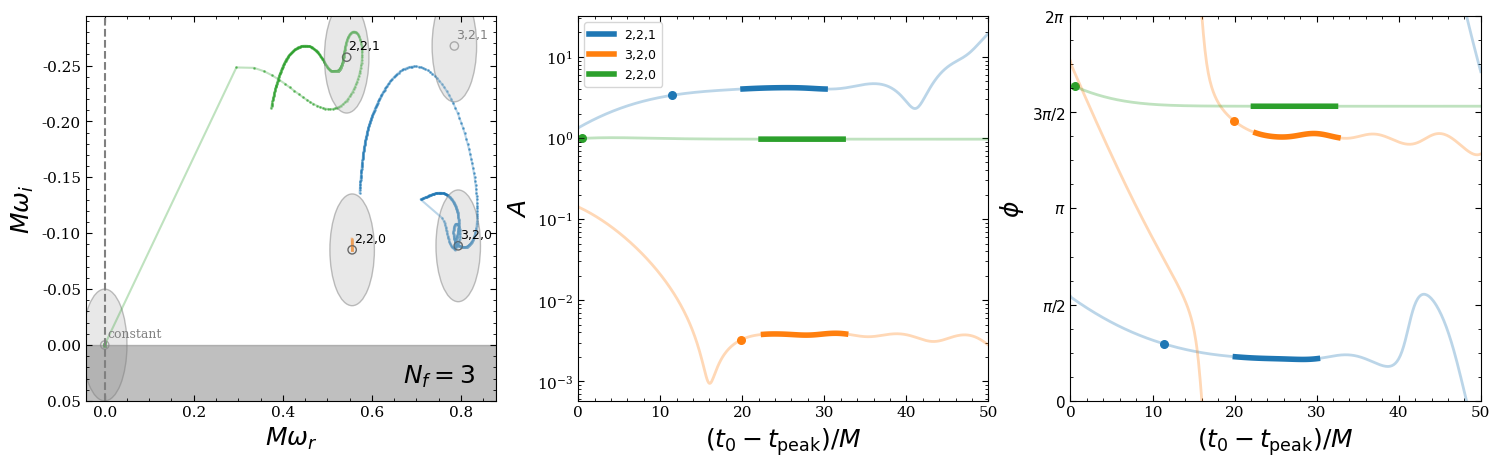

In [5]:
plot_mode_searcher_results(mode_search_sxs.mode_searcher_vary_N)